<a href="https://colab.research.google.com/github/dandamudi-geeta/ComputerVision/blob/main/2348512_CV(Lab2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Basic operations in the context of affine transformations typically refer to the fundamental transformations that can be applied to an object or image. These operations include:

**Translation**: This involves moving an object or image from one position to another along the x and/or y-axis.

**Rotation:** It involves rotating an object or image by a specified angle around a given point.

**Scaling**: This operation involves resizing an object or image by a specified scaling factor along the x and/or y-axis.

**Shear:** Shearing transforms an object or image by skewing it along the x and/or y-axis.

These basic operations form the building blocks of affine transformations and can be combined to create more complex transformations. In the context of the cv2 library, these operations can be implemented using transformation matrices and functions such as **warpAffine** to achieve the desired results.



In [1]:
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2

In [9]:
# Load the image
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/Koi Fish')

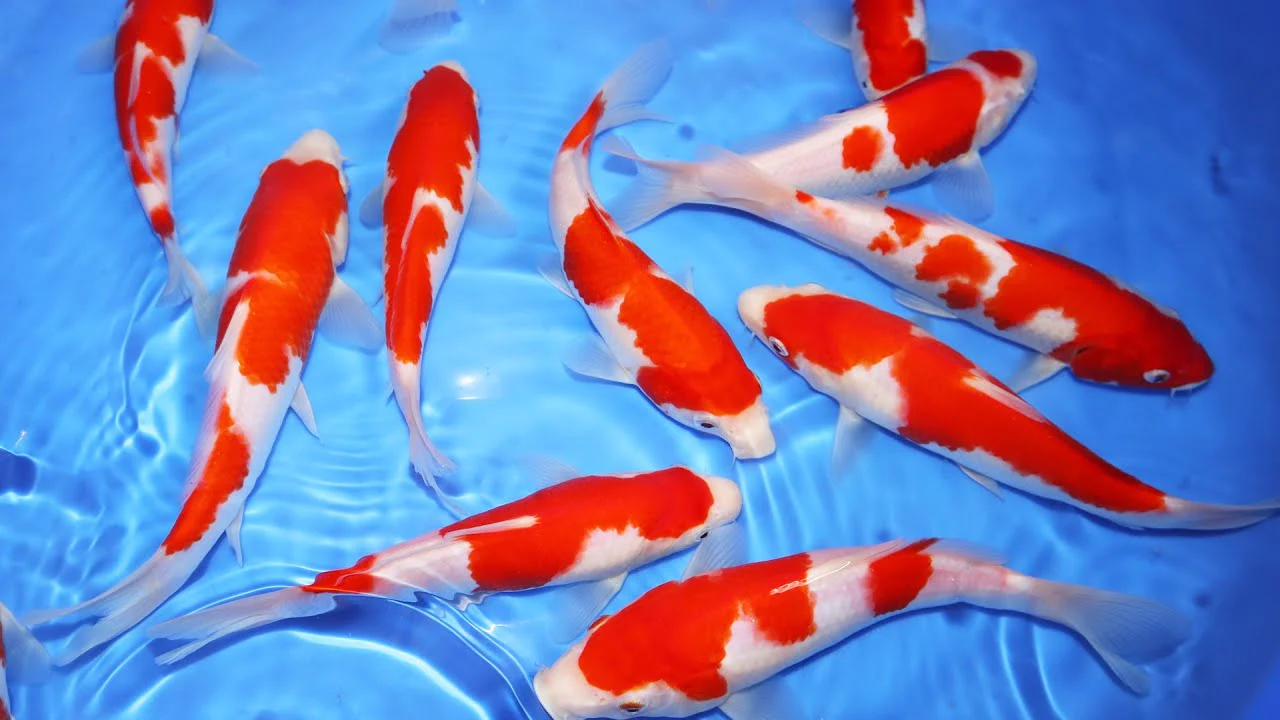

In [10]:
cv2_imshow(img)

In [11]:
pip install opencv-python

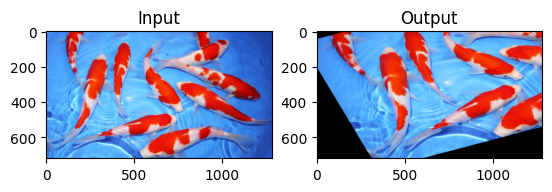

In [12]:
# Define the affine transform
rows, cols, ch = img.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pts1, pts2)

# Apply the affine transform
dst = cv2.warpAffine(img, M, (cols, rows))

# Display the original and transformed images
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Input')
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Output')
plt.show()


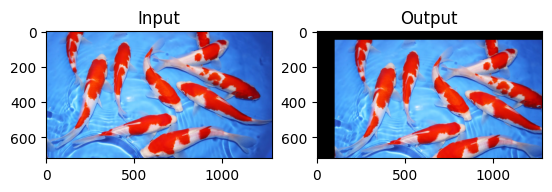

In [13]:
# Define the translation transform
rows, cols, ch = img.shape
M = np.float32([[1, 0, 100], [0, 1, 50]])  # This moves the image 100 pixels to the right and 50 pixels down.

# Apply the translation transform
dst = cv2.warpAffine(img, M, (cols, rows))

# Display the original and transformed images
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Input')
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Output')
plt.show()

In [14]:
# Read and convert the image to gray
img = rgb2gray(imread('/content/Koi Fish'))
w, h = img.shape

**Transformation of Image**

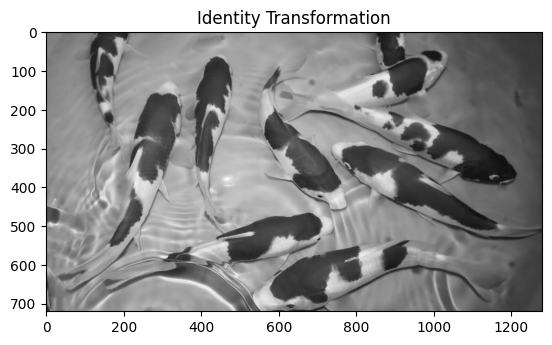

In [15]:
#identity transform
mat_identity = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
img_identity = ndi.affine_transform(img, mat_identity, order=1)
plt.imshow(img_identity, cmap="gray")
plt.title('Identity Transformation')
plt.show()

**Reflection of Image**

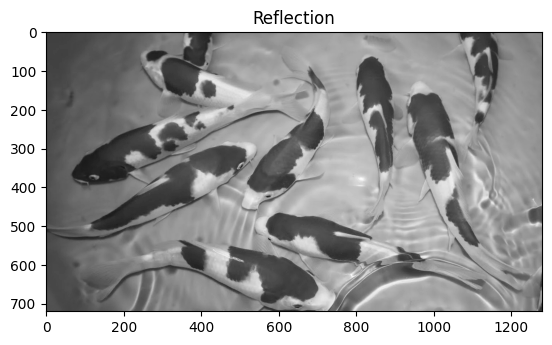

In [16]:
# reflection transform
mat_reflect = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]]) @ np.array([[1, 0, 0], [0, 1, -h], [0, 0, 1]])
img_reflect = ndi.affine_transform(img, mat_reflect, order=1)
plt.imshow(img_reflect, cmap="gray")
plt.title('Reflection')
plt.show()

**Scaling the Image**

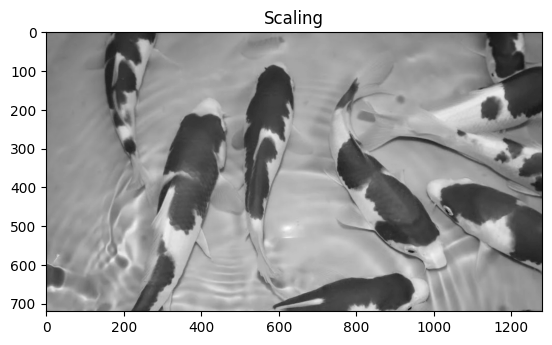

In [17]:
# Scale the image
s_x, s_y = 0.75, 0.75
mat_scale = np.array([[s_x, 0, 0], [0, s_y, 0], [0, 0, 1]])
img_scale = ndi.affine_transform(img, mat_scale, order=1)
plt.imshow(img_scale, cmap="gray")
plt.title('Scaling')
plt.show()

**Rotation of Image**

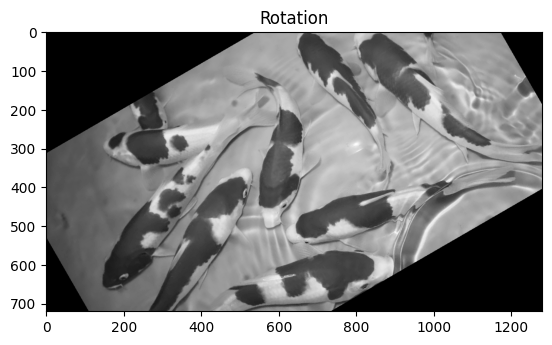

In [18]:
# Rotate the image
theta = np.pi / 6
mat_rotate = np.array([[1, 0, w / 2], [0, 1, h / 2], [0, 0, 1]]) @ \
             np.array([[np.cos(theta), np.sin(theta), 0], [np.sin(theta), -np.cos(theta), 0], [0, 0, 1]]) @ \
             np.array([[1, 0, -w / 2], [0, 1, -h / 2], [0, 0, 1]])
img_rotate = ndi.affine_transform(img, mat_rotate, order=1)
plt.imshow(img_rotate, cmap="gray")
plt.title('Rotation')
plt.show()

**Shearing Of Image**



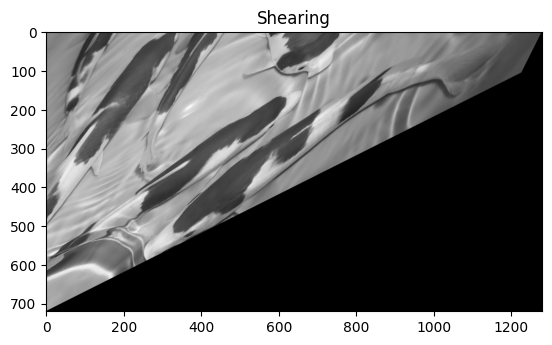

In [19]:
#shear transform to the image
lambda1 = 0.5
mat_shear = np.array([[1, lambda1, 0], [lambda1, 1, 0], [0, 0, 1]])
img_shear = ndi.affine_transform(img, mat_shear, order=1)
plt.imshow(img_shear, cmap="gray")

plt.title('Shearing')
plt.show()